<a href="https://colab.research.google.com/github/Eumin-Zoh/Machine-Learning-for-Decision-Making/blob/main/ML_Group_4_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Group 4

Aryan Sharma  
Anyao Wang  
Eumin Zoh  
Peilin He  
Rohith Anil Chandy

## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Keras

Detailed instructions can be found at https://keras.io.


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

In [ ]:
from google.colab import files 
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)
import utils

Saving utils.py to utils.py


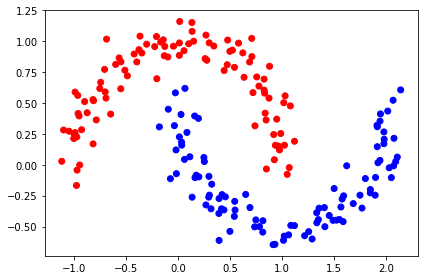

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import lenses_dataset, get_colors


X, y = lenses_dataset()

# For consistent color plotting:

cmap=get_colors(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

Let's split it into a training and testing set 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit. 

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [ ]:
# Relevant imports
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of 
# one layer are the inputs to the next as "Sequential"
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in 
# Keras as a "dense" connection between layers, where every input 
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

Q1. Let's first create neural network with 1 layer 

To add a layer to the architecture, you would simply use .add(LAYER).

Each "input_dim" of each layer should be the number units in the previous layer (in this case the input), and the number of "units" should be the number of outputs of the layer (in this case it will be 1).

In [ ]:
X_train[:5]
y_train[:5]

array([0, 0, 0, 1, 1])

In [ ]:
### YOUR CODE HERE ###
perceptron = Sequential()
perceptron.add(Dense(1, input_dim=X_train.shape[-1], activation= 'sigmoid'))

Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the loss function as "binary_crossentropy". 

In [ ]:
sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)

Q2. Now we train the built perceptron with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
perceptron.fit(X_train, y_train, batch_size = 32, epochs = 100) 

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6109
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6092
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6065
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6034
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5998
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5962
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5926
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5890
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5854
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5816
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5783
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5747
Epoch 13/100
5/5 [==============================] - 0s 6ms/st

Q3. Compute accuracy by implementing your own function. 

In [ ]:
y_preds = perceptron.predict(X_test) 

2/2 [==============================] - 0s 5ms/step


In [ ]:
### Build your own function to calculate accuracy###
def accuracy(y, y_preds):

    c = 0
    t = 0

    for i, j in zip(y, y_preds):

          if j > 0.5:
            j = 1
          else:
            j = 0
          if i == j:
            c = c + 1
          else:
            t = t + 1      
    return c / (c + t)

In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

The accuracy is: 0.85


67/67 [==============================] - 0s 1ms/step


Text(18.75, 0.5, 'Test')

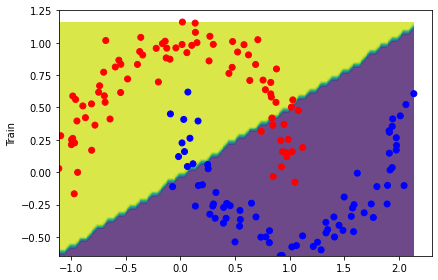

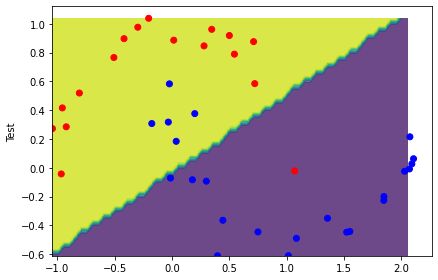

In [ ]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For this exercise, use Keras to create a 2-layer neural network by completing build_one_output_model(). We will then add one hidden layer of 2 units and an output layer of 1 unit (corresponding to our classes- sometimes referred to as a "readout" layer). 

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [ ]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer

from keras.layers import Dense
# SGD is the learning algorithm we will use
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Q1. Create a 2 layer neural network by completing build_one_output_model().

In [ ]:
def build_one_output_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # Add a input hidden layer with 2 units 
    model.add(Dense(2, input_dim = 2, activation = "relu"))

    # Add a final output layer with 1 unit 
    model.add(Dense(1, activation = "sigmoid"))
    
    # Specify SGD optimizer with appropriate values in learning_rate, decay and momentum.
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)

    # compile the model with "binary_crossentropy" loss and SGD optimizer. 
    model.compile(loss="binary_crossentropy", optimizer=sgd)

    return model


In [ ]:
model = build_one_output_model()

Q2. Fit your model by training set with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train, batch_size = 32, epochs = 100) #Check batch sizes and reduce number of epochs

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3842
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3837
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3831
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3826
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3821
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3815
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3810
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3804
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3799
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3794
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.3788
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3783
Epoch 13/100
5/5 [==============================] - 0s 4ms/st

Q3. Compute accuracy by using your own function.

In [ ]:
### YOUR CODE HERE ###
y_preds_v2 = model.predict(X_test) 
print(f'The accuracy is: {accuracy(y_test, y_preds_v2)}')

2/2 [==============================] - 0s 4ms/step
The accuracy is: 0.85


67/67 [==============================] - 0s 1ms/step


Text(18.75, 0.5, 'Test')

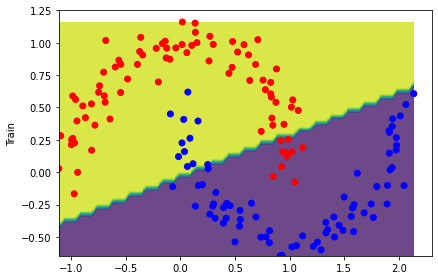

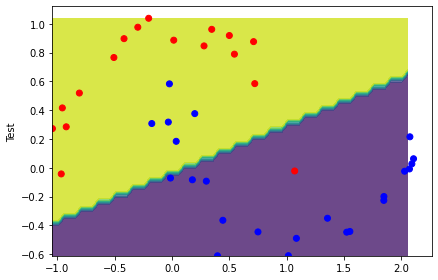

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a classification neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is the number of classes. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding". 

In [ ]:
# Before we can fit the network, we need to one-hot vectorize our response.
# There is a keras method for that.
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [ ]:
# print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]


The one hot encoded vectors will serve as future labels for our models. 

# Exercise 3: 

Q1.Implement build_classification_model() that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2. 


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

We use SGD optimizer and "categorical_crossentropy" loss function to compile the model.

In [ ]:
def build_classification_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # Add a input hidden layer with 2 units 
    model.add(Dense(10, input_dim = 2, activation = "relu"))

    model.add(Dense(5, activation = "relu"))
    
    model.add(Dense(2, activation = "softmax"))

    # Specify SGD optimizer with appropriate values in learning_rate, decay and momentum.
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)

    # compile the model with "binary_crossentropy" loss and SGD optimizer. 
    model.compile(loss = "categorical_crossentropy", optimizer=sgd) # changed from binary

    return model

In [ ]:
model = build_classification_model()

Q2. Fit your model by training set

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train_vectorized, batch_size = 32, epochs = 100) # can add validation data to check loss on validation

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6251
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6237
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6212
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6184
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6151
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6119
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6086
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6051
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6020
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5987
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.5951
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5919
Epoch 13/100
5/5 [==============================] - 0s 3ms/st

Q3. Compute accuracy by using your own function

In [ ]:
y_preds_v3 = model.predict(X_test) 
y_preds_v3_ele = [i[1] for i in y_preds_v3]

print(f'The accuracy is: {accuracy(y_test, y_preds_v3_ele)}')

2/2 [==============================] - 0s 5ms/step
The accuracy is: 0.85


67/67 [==============================] - 0s 1ms/step


Text(18.75, 0.5, 'Test')

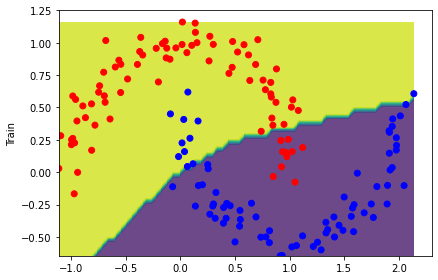

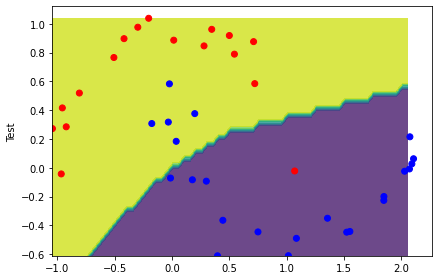

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:
### Short answer-questions

Q1. The learning rate is an important parameter for gradient descent. Please briefly describe a possible issue if we choose too high a learning rate for full batch gradient descent (GD). Also, please briefly describe a possible issue if we choose too high a learning
rate for stochastic gradient descent (SGD), but is not a problem in the full batch setting.

Ans- 

If the learning rate for full batch gradient descent (GD) is too high, the full batch gradient descent would take a huge step for each iteration, and it may cause the model to converge too quickly and therefore bypass the local minimum and lead to divergent behaviors.  
Compared to full batch gradient descent which converges to the local minimum based on appropriate learning rate and other hyperparameters, stochastic gradient descent (SGD) will fluctuate with a high variance and converge to potentially better minimum point with a bigger range. If the learning rate for stochastic gradient descent (SGD) is too high, it might keep overshooting and would not converge to a local minimum until the learning rate is fixed.

References: 

https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

https://towardsdatascience.com/an-overview-of-the-gradient-descent-algorithm-8645c9e4de1e 

https://ruder.io/optimizing-gradient-descent/

https://www.jeremyjordan.me/nn-learning-rate/

Q2. Please give an example in the data augmentation methods that is helpful for classifying images of dogs and cats, but not for classifying handwritten digit.

Ans- 

One example could be taking mirror reflections. This method is helpful when working with images but not with handwritten digits as reflected digits might carry different meaning from the original digit (for instance, 6 & 9).

Q3. Suppose we have the following two neural networks containing fully-connected layers only. 
<div>
<img src="https://ucla.box.com/shared/static/kgninjcbqpztz680q47emsluvituw4ga.jpg" width="300"/>
</div>
Please give one advantage of A over B, and one advantage of B over A.

Ans- 

Advantage of A over B: network A contains more parameters (100*100+100) and therefore has  higher complexity.

Advantage of B over A: network B contains fewer parameters (100* 10+10+10* 100+100) and therefore is useful in the case of dimension reduction (maintaining the most essential characteristics of the original object with as few as possible parameters). Network B is also faster to process and requires less storage capacity. It can be used to compress, transfer, and restore images.


# Exercise 5:

Now let's revisit the classification problem (Dataset 1) in Homework 2. Build a neural network to predict the output in the default payment dataset. The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

"CreditDefault_training.csv" has 3985 records. 

"CreditDefault_Xtest.csv" contains contains 1000 rows and 14 columns. This is the test set which only contains the features.

Q1. Read the data<br/>
- Apply standardization to continuous values<br/> 
- Convert categorical variables and the target "default.payment.next.month" into one-hot encodings. <br>
- Split data into train and validation set<br/>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [ ]:
### YOUR CODE HERE ###
# Load your training data set

uploaded = files.upload()

Saving CreditDefault_training.csv to CreditDefault_training (3).csv
Saving CreditDefault_Xtest.csv to CreditDefault_Xtest (3).csv


In [ ]:
train = pd.read_csv('CreditDefault_training.csv')

test = pd.read_csv('CreditDefault_Xtest.csv')

In [ ]:
# Split data into X (features) and y (target)
X = train.iloc[:,:-1]

y = train.iloc[:,-1]

Standardization and one-hot encoding for training set and test set

In [ ]:
# Standardization & One-Hot Encoding
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()

#Group the columns into a list of categorical and numerical columns so that it can be referenced easily
numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

#Use fit transform for the training data and transform for the test data
X[numerical_cols] = normalizer.fit_transform(X[numerical_cols])
test[numerical_cols] = normalizer.transform(test[numerical_cols])

#Appending both test and train data together will help in maintaining the same number of columns while doing one hot encoding.
total_df = X.append(test, ignore_index = True)

# to convert categorical value to dummy variables, we can use the `get_dummies` function of pandas.
total_df = pd.get_dummies(total_df, columns = categorical_cols, drop_first=True)

#Split the data back into training (X_new) and test data (test_new).
X_new = total_df.iloc[:3985,]
test_new = total_df.iloc[3985:,]
test_new = test_new.reset_index(drop = True)

y_vectorized = pd.get_dummies(y)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
# Split data into training and validation set (the code has been provided)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_new, y_vectorized, test_size=0.3, random_state=42)

In [ ]:
# Print out the shape of X_train
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)

(2789, 73)
(2789, 2)
(1196, 73)


Q2. Build a neural network to predict the output in the "CreditDefault_training.csv". The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

You can try different number of layers, different number of units in layers and experiment with hyperparameters. 

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please use 'relu' activation function for all intermediate layers.

Please build your model in the build_final_model() function

In [ ]:
def build_final_model():

    model = Sequential()
    ### YOUR CODE HERE ###
    
    # First add fully-connected (Dense) hidden layers with appropriate input dimension
    model.add(Dense(20, input_dim = 73, activation = "relu"))

    # Drop out layer
    model.add(Dropout(0.3))

    # Continues the process 
    model.add(Dense(10, activation = "relu"))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation = "relu"))
    model.add(Dropout(0.3))

    # Finally, add a readout layer
    model.add(Dense(2, activation = "softmax"))

    ######################
    sgd = SGD(learning_rate=0.01, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])
    
    return model

In [ ]:
model = build_final_model()

Q3. Fit the model by training set with epochs=100, batch_size=32

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
88/88 [==============================] - 1s 3ms/step - loss: 0.5909 - accuracy: 0.7236
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.7673
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.7766
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5116 - accuracy: 0.7766
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4984 - accuracy: 0.7813
Epoch 6/100
88/88 [==============================] - 0s 4ms/step - loss: 0.4930 - accuracy: 0.7906
Epoch 7/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4880 - accuracy: 0.7881
Epoch 8/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.7877
Epoch 9/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.7867
Epoch 10/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.7946
Epoch 11/

Q4. Obtain predictions on validation set and print accuracy, precision & recall and F1 score.

F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
y_preds_cd = model.predict(X_val)

y_val_arr = y_val.values
y_val2 = np.where(y_val_arr[:,1].reshape(-1) >= 0.5, 1,0)
y_pred2 = np.where(y_preds_cd[:,1].reshape(-1) >= 0.5, 1,0)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print(f'Accuracy: {accuracy_score(y_val2, y_pred2)}')
print(f'Precision: {precision_score(y_val2, y_pred2)}')
print(f'Recall: {recall_score(y_val2, y_pred2)}')
print(f'F1 score: {f1_score(y_val2, y_pred2)}')


38/38 [==============================] - 0s 3ms/step
Accuracy: 0.822742474916388
Precision: 0.6883116883116883
Recall: 0.3925925925925926
F1 score: 0.5


Q5. Plot the ROC curve by giving appropriate names for title and axes. (Pending)

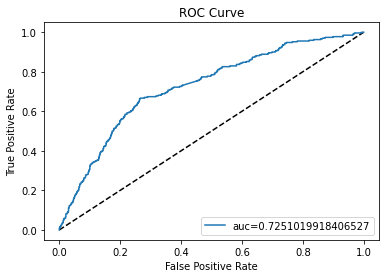

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes. 
### WRITE CODE HERE
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y_pred_proba = list()
for i in range(len(y_preds_cd)):
    y_pred_proba.append(min(y_preds_cd[i]))
fpr, tpr, _ = metrics.roc_curve(y_val2, y_pred_proba) 
auc = metrics.roc_auc_score(y_val2, y_pred_proba)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()


Is the accuracy value impressive for this dataset? Please explain based on the structure of this dataset. 

For these five metrics (accuracy, precision, recall, F1 score and AUC), please explain their connections and differences. For our dataset, which metrics should we focus more on?


Ans-

Yes, the accuracy on this dataset would be high, given that we have an unbalanced dataset (more do not default (0/ negative) versus those that default (1/positive)).

**Accuracy** is the ratio of correctly predicted observations to total predicted observations. Accuracy matters when the dataset is balanced with same amount of false positives and false negatives and when the costs of false positives and false negatives are equivalent.

**Precision** measures the proportion of data correctly predicted out of all data predicted as positive (default). In this case, precision is used to find the percentage of correctly predicted payment default people for next month over the total predicted payment default people for next month which is meant to measure the false positive rate.

**Recall** measures the proportion of data correctly predicted out of all data that are actually positive(default). In this case, recall is used to find the percentage of correctly predicted payment default people for next month over the actual payment default people for next month.

**F1 score** taking both precision and recall into account, is a suitable performance metric for unbalanced data. F1 score is the weighted average of precision and recall.

**AUC** stands for the area under the ROC curve, which summarizes the TP and FP rates for a classifier model across all threshold values. We can use this to compare different classifier models directly. 

In this dataset, **recall** and **F1 score** are the metrics we should focus on more because the cost of false negatives is higher than the cost of false positives in this unbalanced dataset. The case of a false negative is that someone with bad credit was misclassified as having good credit and is eligible to borrow loans which could cost the company a lot of money if the person couldn't pay back the money he borrowed next month. We think F1 score is important given that the data is unbalanced.


References: https://subscription.packtpub.com/book/big-data-&-business-intelligence/9781788397872/1/ch01lvl1sec27/pros-and-cons-of-neural-networks

https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5


#### Tuning hyperparameters using cross-validation:<br/>
Cross-validation in neural networks is computationally expensive. So we will perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function.

Here, we will use KerasClassifier class, which act as a wrapper of scikit-learn’s library in Keras comes as a handy tool for automating the tuning process.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
from keras.wrappers.scikit_learn import KerasClassifier

Q6. First we create a function to build neural network model with activation function and learning rate of SGD as parameters

In [ ]:
def create_model(learning_rate, activation):
  
    # Create an SGD optimizer with its learning rate equal to the "learning_rate" parameter value of create_model
    opt = SGD(learning_rate = learning_rate , decay = 1e-7, momentum = .9)
  
    # Create your neural network model 
    model = Sequential()
    # Please keep the same architecture as the NN model you have built above in order for comparison
    # Please use the activation given by the "activation" parameter value of create_model for all inner layers except for the final layer.
    # For the final output layer, choose an appropriate activation function by yourself.
    
    model.add(Dense(20, input_dim=73, activation = activation))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation = activation))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation = activation))
    model.add(Dropout(0.2))

    # Finally, add a readout layer
    model.add(Dense(2, activation = "softmax"))
   
    # Compile the model
    model.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics=["accuracy"])
    return model

Create a model object using KerasClassifier from keras.wrappers.scikit_learn by passing the create_model function.

In [ ]:
model = KerasClassifier(build_fn = create_model,
                       verbose = 0)

<ipython-input-111-f0be3b82ac3c>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,


Q7. Try the following hyperparameters:

- activation function: relu, tanh

- batch size: 16, 32 and 64

- epochs: 100, 200 and 500

- learning rate: 0.01, 0.001 and 0.0001

Use dictionary object to define the parameter search space.

In [ ]:
### WRITE CODE HERE
param_grid = {
    'activation': ['relu','tanh'],
    'batch_size': [ 16, 32, 64],
    'epochs': [100, 200, 500],
    'learning_rate': [0.01, 0.001, 0.0001],
}

Next we perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function. We select the randomized search as it works faster than a grid search. Here, we will perform a 5-fold cross-validation search. 

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV for the use of RandomizedSearchCV.

In [ ]:
### WRITE CODE HERE 
random_search = RandomizedSearchCV(estimator = model,
                                   param_distributions = param_grid,
                                   cv = 5) 

# shall we need to add scoring here?

In [ ]:
random_search_results = random_search.fit(X_train, y_train) # it may take several hours.

Q8. Print the best model parameters 

In [ ]:
### WRITE CODE HERE 
random_search.best_params_

{'learning_rate': 0.001, 'epochs': 500, 'batch_size': 64, 'activation': 'tanh'}

Our team tried to use **best_estimator_** to fit the model with best parameter set but was not giving us the expected results. Therefore, we manually built the neural network model with the best parameter set 
`{'learning_rate': 0.001, 'epochs': 500, 'batch_size': 64, 'activation': 'tanh'} `in Q9.

Q9. Fit the model with the Best Parameter Set

In [ ]:
### WRITE CODE HERE 
best_kc = create_model(0.001, 'tanh')
best_kc.fit(X_train, y_train, epochs = 500, batch_size = 64)

Epoch 1/500
44/44 [==============================] - 1s 3ms/step - loss: 0.6008 - accuracy: 0.6830
Epoch 2/500
44/44 [==============================] - 0s 3ms/step - loss: 0.5724 - accuracy: 0.7257
Epoch 3/500
44/44 [==============================] - 0s 3ms/step - loss: 0.5479 - accuracy: 0.7508
Epoch 4/500
44/44 [==============================] - 0s 3ms/step - loss: 0.5479 - accuracy: 0.7494
Epoch 5/500
44/44 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.7565
Epoch 6/500
44/44 [==============================] - 0s 3ms/step - loss: 0.5342 - accuracy: 0.7558
Epoch 7/500
44/44 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7580
Epoch 8/500
44/44 [==============================] - 0s 3ms/step - loss: 0.5189 - accuracy: 0.7662
Epoch 9/500
44/44 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.7673
Epoch 10/500
44/44 [==============================] - 0s 3ms/step - loss: 0.5103 - accuracy: 0.7669
Epoch 11/

Q10. Obtain predictions on validation set and print accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE 
NN_yval_pred = best_kc.predict(X_val) 

NN_yval_pred_list = list()
for i in range(len(NN_yval_pred)):
    NN_yval_pred_list.append(np.argmax(NN_yval_pred[i]))

print("Accuracy =", accuracy_score(y_val2, NN_yval_pred_list))
print("Precision =", precision_score(y_val2, NN_yval_pred_list))
print("Recall =", recall_score(y_val2, NN_yval_pred_list))
print("F1 score =", f1_score(y_val2, NN_yval_pred_list))

38/38 [==============================] - 0s 1ms/step
Accuracy = 0.8135451505016722
Precision = 0.6113744075829384
Recall = 0.4777777777777778
F1 score = 0.5363825363825363


Do you get a better accuracy/recall/precision/F1 score than the first NN model you have built in exercise 5? Explain.

Ans- We did get better accuracy, recall, precision and F1 score for the optimized NN model than the original NN model. This is expected because we used RandomizedSearchCV function to find the best combination of hyperparameters that gives the highest score. Therefore we expect to see better overall scores in the optimized model.

### Logistic Regression and Random Forest
In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same default payment dataset to produce Logistic Regression and Random Forest models.

Q11. Implement a function logistic_regression_model that returns a logistic regression model with the best paprameters. You will use GridSearchCV to find the best parameters. The parameters search space is up to you. If there is any ConvergenceWarning, increase the number of iterations.

In [ ]:
from sklearn.linear_model import LogisticRegression

def logistic_regression_model(X_train, y_train):
    parameters = {
      'penalty' : ['l1','l2'], 
      'C'       : [0.1, 0.5],
      'solver'  : ['liblinear'],
    }

    lg = LogisticRegression()

    grid_search = GridSearchCV(estimator = lg, param_grid = parameters, scoring = 'accuracy', cv = 10)
    
    # Fit the model with training data 
    grid_search.fit(X_train, y_train)

    # Print the best parameters
    print("Best Parameters:", grid_search.best_params_)

    # best_estimator_ attribute creates the model with best parameters
    best_lg = grid_search.best_estimator_

    return best_lg 

Q12. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
# fit the model
y_train_list = list()
y_train_arr = y_train.values
for i in range(len(y_train_arr)):
    y_train_list.append(np.argmax(y_train_arr[i]))

best_lg = logistic_regression_model(X_train, y_train_list)
best_lg.fit(X_train, y_train_list)

# compute accuracy,precision,recall on validation set
LG_yval_pred = best_lg.predict(X_val)

print("\nAccuracy =", accuracy_score(y_val2, LG_yval_pred))
print("Precision =", precision_score(y_val2, LG_yval_pred))
print("Recall =", recall_score(y_val2, LG_yval_pred))  
print("F1 score =", f1_score(y_val2, LG_yval_pred))

Best Parameters: {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy = 0.8202341137123745
Precision = 0.6608187134502924
Recall = 0.4185185185185185
F1 score = 0.5124716553287981


Q13. Plot the ROC curve by giving appropriate names for title and axes. 

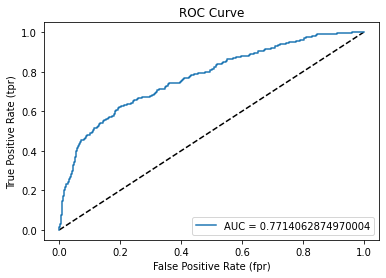

AUC is: 0.7714062874970004


In [ ]:
### WRITE CODE HERE
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y_pred_proba_lg = best_lg.predict_proba(X_val)
fpr, tpr, _ = metrics.roc_curve(y_val2, y_pred_proba_lg[:,1]) 
auc_lg = metrics.roc_auc_score(y_val2, y_pred_proba_lg[:,1])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label = "AUC = "+str(auc_lg))
plt.legend(loc = 4)
plt.title('ROC Curve')
plt.ylabel('True Positive Rate (tpr)')
plt.xlabel('False Positive Rate (fpr)')
plt.show()

print("AUC is:",auc_lg) 

Q14. Implement a function random_forest_model that returns a random forest model with the best paprameters. You will apply GridSearchCV to find the best parameters. The parameter search space is up to you. (Please set the random state of RandomForestClassifier to be 26.)

In [ ]:
def random_forest_model(X_train, y_train):
    rf = RandomForestClassifier(random_state = 26) # Please set the random state to be 26
    
    param_grid = {
        'max_depth': [10, 20, 30, 40, 50, None],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [1, 2, 3, 5],
        'min_samples_split': [2, 3, 5, 7],
        'n_estimators': [25, 50, 100, 200, 400],
        'random_state': [26]
    }

    grid_search2 = GridSearchCV(estimator = rf, scoring = 'recall', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
    
    # Fit the model with training data
    grid_search2.fit(X_train, y_train)

    # Print the best parameters
    print("Best Parameters:", grid_search2.best_params_)

    best_rf = grid_search2.best_estimator_
    
    return best_rf

Q15. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
best_rf = random_forest_model(X_train, y_train_list)
best_rf.fit(X_train, y_train_list)

# compute accuracy,precision,recall on validation set
RF_yval_pred = best_rf.predict(X_val)

print("\nAccuracy =", accuracy_score(y_val2, RF_yval_pred))
print("Precision =", precision_score(y_val2, RF_yval_pred))
print("Recall =", recall_score(y_val2, RF_yval_pred)) 
print("F1 score =", f1_score(y_val2, RF_yval_pred)) 

Fitting 3 folds for each of 960 candidates, totalling 2880 fits
Best Parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 26}

Accuracy = 0.8127090301003345
Precision = 0.6236559139784946
Recall = 0.42962962962962964
F1 score = 0.5087719298245614


Q16. Plot the ROC curve by giving appropriate names for title and axes.

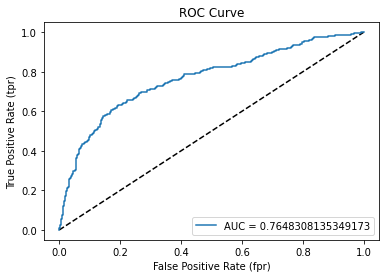

AUC is: 0.7648308135349173


In [ ]:
### WRITE CODE HERE
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y_pred_proba_rf = best_rf.predict_proba(X_val)
fpr, tpr, _ = metrics.roc_curve(y_val2, y_pred_proba_rf[:,1]) 
auc_rf = metrics.roc_auc_score(y_val2, y_pred_proba_rf[:,1])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label = "AUC = "+str(auc_rf))
plt.legend(loc = 4)
plt.title('ROC Curve')
plt.ylabel('True Positive Rate (tpr)')
plt.xlabel('False Positive Rate (fpr)')
plt.show()

print("AUC is:",auc_rf) 

Q17: Which of the above 3 models (NN, Logistic function and random forest) worked best for you? Explain in details the reason for good/bad performance for each of the models?

Ans - Since we focus on recall and F1 score to pick the best model, the optimized NN model works the best for us because it has the highest recall score of 0.478 and highest F1 score of 0.536 out of all three models. 

Logistic Regression is the easiest one to implement, gives the highest accuracy and precision scores and takes the shortest time. It didn't work well in the aspect of having more categorical variables than numerical variables. Random Forest works better when the data is unbalanced with lots of categorical variables but it takes a long time to tune the hyperparameters. NN model takes the longest time to tune the hyperparameters but gives the highest scores in recall and F1 which explain more on the cost of false negatives and false positives in this case. 

References: https://www.linkedin.com/pulse/logistic-regression-vs-random-forest-classifier-chintan-chitroda/

https://scholar.smu.edu/cgi/viewcontent.cgi?article=1041&context=datasciencereview#:~:text=In%20general%2C%20logistic%20regression%20performs,variables%20increases%20in%20a%20dataset.




Using the best of the above 3 models, obtain predictions for the test set.

In [ ]:
### YOUR CODE HERE ###
y_test_pred = best_kc.predict(test_new)

test_pred_cat = list() 
for i in range(len(y_test_pred)):
    test_pred_cat.append(np.argmax(y_test_pred[i]))
test_pred_cat[:15]

32/32 [==============================] - 0s 2ms/step


[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

# Exercise 6

### Convolution Neural Netwrok

In neural networks, Convolutional neural network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. Objects detections, recognition faces etc., are some of the areas where CNNs are widely used.

CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. 

The dataset which we will use in this part is Fashion-MNIST classification dataset. This is a dataset of 60,000 28x28 pixel grayscale images of items of 10 types of clothing, along with a test set of 10,000 images.

The mapping of all 0-9 integers to class labels is listed below.

0: T-shirt/top<br>
1: Trouser<br>
2: Pullover<br>
3: Dress<br>
4: Coat<br>
5: Sandal<br>
6: Shirt<br>
7: Sneaker<br>
8: Bag<br>
9: Ankle boot<br>



In [ ]:
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


Create a plot of the first nine images in the training dataset.

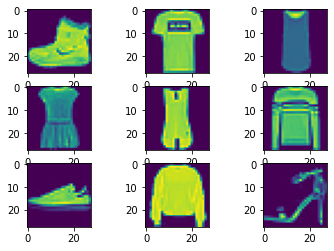

In [ ]:
import matplotlib.pyplot as plt
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

Q1. To process images in neural network, we have to indicate how may channels (depth) we are going to use. For instance, a coloful image from a standard digital camera will have a red, green and blue channel (RGB), so it has 3 channels (i.e. depth=3) in total, whereas a grayscale image only has 1 channel (depth=1). 

The Fashion-MNIST dataset is grayscale, and we can reshape Fashion-MNIST to have a single channel. (i.e., Convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1.)

In [ ]:
### YOUR CODE HERE ###
x_train_v2 = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test_v2 = x_test.reshape((x_test.shape[0], 28, 28, 1))


We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

Q2. Normalize the pixel values of grayscale images, e.g. rescale them to the range [0, 1]. 

In [ ]:
### YOUR CODE HERE ###
x_train_v2_s1 = x_train_v2.astype('float32')
x_test_v2_s1 = x_test_v2.astype('float32')
x_train_v2_s = x_train_v2_s1 / 255.0
x_test_v2_s = x_test_v2_s1 / 255.0

Q3. You also need to convert the target values into binary values (one-hot encoding).

In [ ]:
### YOUR CODE HERE ###
y_train_v2 = to_categorical(y_train)
y_test_v2 = to_categorical(y_test)

Q4. Implement build_cnn_model() that returns a CNN model that takes an input of image, passes it to:
- A convolution layer with 32 filters and kernel size 5x5
- A MaxPool layer of size 2x2
- Another convolution layer with 64 filters and kernel size 5x5
- Another MaxPool layer of size 2x2
- Another convolution layer with 128 filters and kernel size 3x3
- Another MaxPool layer of size 2x2
- Flatten it
- Add one regular fully-connected layer of 128 units
- Finally, output your classification by another fully-connected layer, whose number of units is determined by yourself.

Our goal is to minimize the categorical_crossentropy loss.

As before, use the "relu" activation function for all the convolution/full-connected layers, but use the "softmax" activation for the final fully-connected layer (readout layer).

The optimizer and loss function have been filled in for you.

In [ ]:
def build_cnn_model():
    model = Sequential()
    ### YOUR CODE HERE ###
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    ######################
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model = build_cnn_model()

Q5. Fit your CNN model by x_train, y_train

In [ ]:
### YOUR CODE HERE ###
model.fit(x_train_v2_s, y_train_v2, batch_size = 100, epochs = 10)

Epoch 1/10
600/600 [==============================] - 58s 4ms/step - loss: 0.6037 - accuracy: 0.7806
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3619 - accuracy: 0.8684
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3054 - accuracy: 0.8880
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2726 - accuracy: 0.8996
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2483 - accuracy: 0.9088
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2233 - accuracy: 0.9177
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2102 - accuracy: 0.9221
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1914 - accuracy: 0.9291
Epoch 9/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1760 - accuracy: 0.9347
Epoch 10/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1633 - accuracy: 0.939

Q6. Evaluate your model on test set and print out the entropy loss and the accuracy

In [ ]:
### YOUR CODE HERE ###
print('Cross Entropy Loss:', model.evaluate(x_test_v2_s, y_test_v2)[0])
print('Accuracy:', model.evaluate(x_test_v2_s, y_test_v2)[1] * 100 , '%')

313/313 [==============================] - 1s 3ms/step - loss: 0.2729 - accuracy: 0.9077
Cross Entropy Loss: 0.2728923261165619
313/313 [==============================] - 1s 3ms/step - loss: 0.2729 - accuracy: 0.9077
Accuracy: 90.77000021934509 %


Q7. Now let's check the performance of multi-layer perceptrons (MLP) in image classfication. Implement build_mlp_model() that returns a MLP model that takes an input of image, passes it to 1 Flatten layer then 3 full-connected layers and the final fully-connected readout layer.

The number of units in each full-connected layer is determined by yourself. 

As before, use the "relu" activation function for the first 2 full-connected layers, but use the "softmax" activation for the final fully-connected layer (readout layer).

The optimizer and loss function have been filled in for you.

In [ ]:
def build_mlp_model():
    model = Sequential()
    ### YOUR CODE HERE ###
    model.add(Flatten())

    model.add(Dense(400, input_shape = (784,), activation = "relu"))

    model.add(Dense(200,  activation = "relu"))

    model.add(Dense(50,  activation = "relu"))
    
    model.add(Dense(10,  activation = "softmax"))
   
    ######################
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model2 = build_mlp_model()

Q8. Fit your MLP model by x_train, y_train. (Please use the same parameters as those in CNN model for comparison)

In [ ]:
### YOUR CODE HERE ###
model2.fit(x_train_v2_s, y_train_v2, batch_size = 100, epochs = 10)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5006 - accuracy: 0.8196
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3609 - accuracy: 0.8689
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3234 - accuracy: 0.8806
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2995 - accuracy: 0.8887
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2820 - accuracy: 0.8945
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2653 - accuracy: 0.9000
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2554 - accuracy: 0.9041
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2473 - accuracy: 0.9063
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2327 - accuracy: 0.9128
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2224 - accuracy: 0.9156

Q9. Evaluate your model on test set and print out the entropy loss and the accuracy

In [ ]:
### YOUR CODE HERE ###
print('Cross Entropy Loss:', model2.evaluate(x_test_v2_s, y_test_v2)[0])
print('Accuracy:', model2.evaluate(x_test_v2_s, y_test_v2)[1] * 100 , '%')

313/313 [==============================] - 1s 3ms/step - loss: 0.3433 - accuracy: 0.8833
Cross Entropy Loss: 0.3432762324810028
313/313 [==============================] - 1s 3ms/step - loss: 0.3433 - accuracy: 0.8833
Accuracy: 88.33000063896179 %


Q10. Which of the above 2 models worked best for you? Explain in details the reason for good/bad performance for each of the models.

Ans - CNN model works better than FC model because CNN model considers the spatial relationships between neighboring pixels while FC model is permutation-invariant, which means that any permutation of flattened input would learn the same parameters of the network. 

# Exercise 7
### Autoencoder

So far, we have learned a lot about how to use neural networks in supervised learning, but in fact there are also many applications of neural networks in unsupervised learning such as autoencoder.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

In this part, we will continue using Fashion-MNIST dataset.

Q1. Implement an autoencoder model that takes an input of 28x28x1 images, compress them into (4,) vectors by an econder, and then decompress them back to 28x28 images by a decoder. In other words, the orginal dimensionality is 784 (=28x28), but we want to compress it into the dimensionality of 4 by an encoder, then reconstruct these (4,) vectors back to 28x28 images by an decoder. 

You only need to define an encoder and a decoder. In your encoder, you need to inlude a flatten layer and several fully-connected layers, while in your decoder, you are required to use fully-connected layers and one reshape layer. Do not use other types of layers.

You will determine the number of fully-connected layers, number of units, and activation functions by yourself.

The optimizer and loss function have been filled in for you.

In [ ]:
from keras.models import Model
from keras.layers import Reshape, Input

# encoder layers
encoding_dim = 4
encoded = Sequential()
# You don't need to build a new function, just add the layers
### YOUR CODE HERE ###
encoded.add(Flatten())
encoded.add(Dense(400, activation='relu', input_shape=(784,)))
encoded.add(Dense(100, activation = "relu"))
encoded.add(Dense(40, activation='relu'))
encoded.add(Dense(10, activation='relu'))
encoded.add(Dense(encoding_dim, activation=None))



######################

# decoder layers
decoded = Sequential()
### YOUR CODE HERE ###
decoded.add(Dense(10, activation='relu', input_shape=(encoding_dim,)))
decoded.add(Dense(40, activation='relu'))
decoded.add(Dense(100, activation='relu'))
decoded.add(Dense(400, activation='relu'))
decoded.add(Dense(784, activation='relu'))
decoded.add(Reshape((28,28,1)))


######################
img_x, img_y = 28, 28
input_x = Input(shape=(img_x, img_y, 1))
code = encoded(input_x)
output = decoded(code)

autoencoder = Model(input_x,output)

autoencoder.compile(optimizer='adam', loss='mse')

Q2. Fit your model by x_train only

In [ ]:
### YOUR CODE HERE ###
autoencoder.fit(x_train_v2_s, x_train_v2_s, epochs = 10, batch_size = 64) 

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0446
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0275
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0246
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0231
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0219
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0213
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0207
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0201
Epoch 9/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0197
Epoch 10/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0196


Q3. Evaluate your model on test set and print out the MSE and output images as numpy arrays.

In [ ]:
# Test your autoencoder on test set, print out the MSE
### YOUR CODE HERE ###
results2 = autoencoder.evaluate(x_test_v2_s, x_test_v2_s)
print(results2)


######################
# output images as numpy arrays
encoded_imgs = encoded(x_test).numpy()
decoded_imgs = decoded(encoded_imgs).numpy()

313/313 [==============================] - 1s 2ms/step - loss: 0.0197
0.019719643518328667


Plot your encoded image

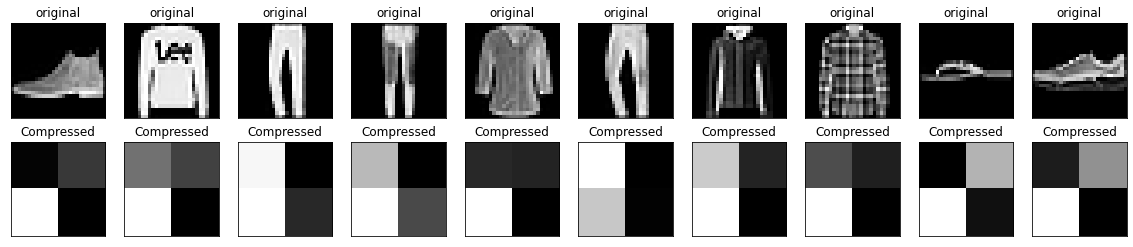

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(2,2))
  plt.title("Compressed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Plot your decoded image

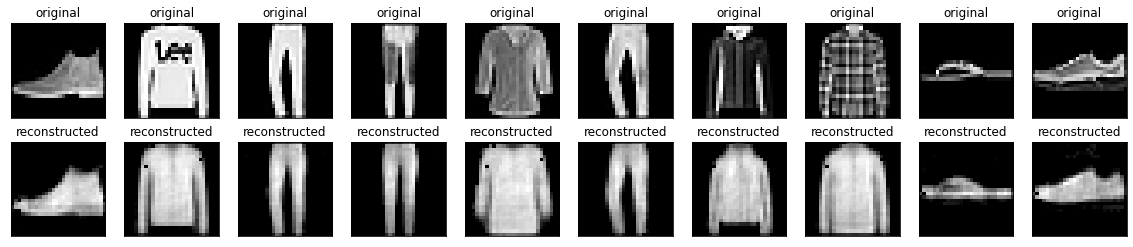

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()